In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report,f1_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# emotion_data = pd.read_csv("Emotion_Recognition_Dataset.csv")
emotion_data =pd.read_excel('emotions_Dataset.xlsx')
emotion_data.head()

,text,sentiment
0,جناب صفیہ خوش خوش آئیںاور سب کو خوشخبری سنائی ۔,Joy
1,اعلامیہ کے مطابق اجلاس میں تمام رکن ممالک کو ج...,Joy
2,صدر صاحب نے مجھے بڑے پُرتپاک انداز میں خوش آمد...,Joy
3,کشمیریوں کے اسی فیصلے کو بشمول پاکستان اور بھا...,Joy
4,سارک رہنماؤں نے اسلام آباد میں ہو نے والی سارک...,Joy


In [6]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1121 non-null   object
 1   sentiment  1121 non-null   object
dtypes: object(2)
memory usage: 17.6+ KB


In [7]:
# emotion_data["Emotion"].value_counts()
X  = emotion_data["text"]
y= emotion_data['sentiment']
emotion_data["sentiment"].value_counts()

sentiment
Neutral      235
Joy          200
Awareness    199
Anger        172
Fear         162
Sadness      153
Name: count, dtype: int64

### Checking For Missing Values

In [8]:
print(emotion_data['text'].isnull().sum())
print(emotion_data['sentiment'].isnull().sum())

0
0


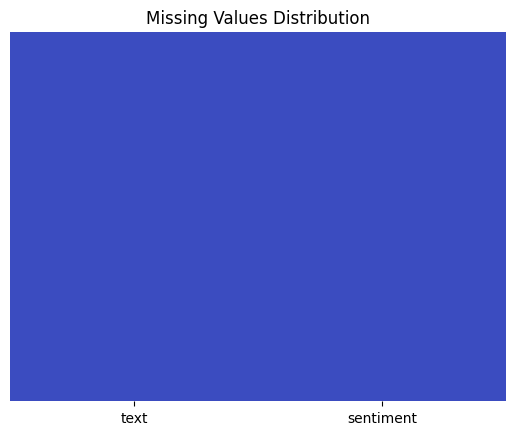

In [9]:
sns.heatmap(emotion_data.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")
plt.title("Missing Values Distribution")
plt.show()

###  Dataset Balanced Or Imbalanced

<Axes: xlabel='sentiment', ylabel='count'>

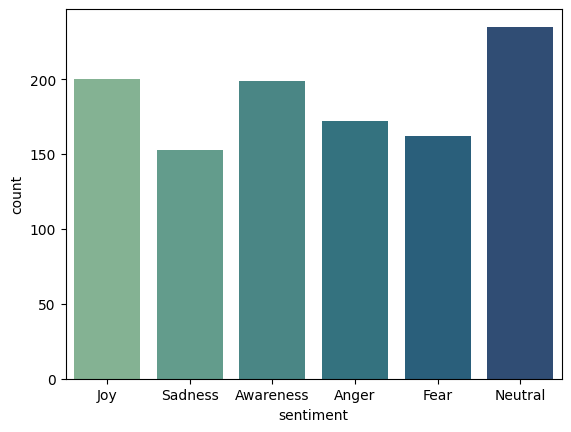

In [10]:

X  = emotion_data["text"]
y= emotion_data['sentiment']
sns.countplot(emotion_data,x=y,palette='crest',hue='sentiment')

In [11]:
def check_balance(data, target_column, threshold=0.1):
    """
    Checks if the dataset is balanced or imbalanced.

    Parameters:
    - data: DataFrame
    - target_column: str, the column containing class labels
    - threshold: float, the maximum acceptable difference between class proportions

    Returns:
    - str: "Balanced" or "Imbalanced"
    """
    proportions = data[target_column].value_counts(normalize=True)  # count values in percent
    max_diff = proportions.max() - proportions.min()
    return "Balanced" if max_diff <= threshold else "Imbalanced"

# Example usage
result = check_balance(emotion_data, 'sentiment')
print(result)  # Output: Balanced

Balanced


In [12]:
# sentiment class values are in percentage  for example Neutral are  20.963426 percentage in the dataset
emotion_data['sentiment'].value_counts(normalize=True) * 100

sentiment
Neutral      20.963426
Joy          17.841213
Awareness    17.752007
Anger        15.343443
Fear         14.451383
Sadness      13.648528
Name: proportion, dtype: float64

In [13]:
# remove numbers
import re

# Function to remove numbers from a string
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the 'text' column
emotion_data['text'] = emotion_data['text'].apply(remove_numbers)

X  = emotion_data["text"]
y= emotion_data['sentiment']

In [14]:
# split the data into train and split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [15]:
# stopwords
urdu_stopwords = [
    'آؤ', 'اور', 'پر', 'یہ', 'کے', 'ہیں', 'تو', 'ہے', 'کا', 'کو', 'سے', 'بھی', 'ہم', 'میں'
]


 ### Bag Of Word Approch CountVectorizer

In [16]:
# Using bag of words approch to convert the text into numberical value
vectorizer = CountVectorizer(analyzer='word',stop_words=urdu_stopwords)
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)
X_train_vector = X_train_vector.toarray()



In [17]:
vectorizer.get_feature_names_out()

array(['ءبہت', 'ءوالی', 'آئرلینڈ', ..., 'یہودیوں', 'یہی', 'ےاد'],
      dtype=object)

In [18]:
vectorizer.vocabulary_

{'سند': 2021,
 'باد': 549,
 'ٹریول': 3547,
 'ایجنسی': 499,
 'کھل': 4177,
 'گئی': 4253,
 'ہو': 4449,
 'گی': 4373,
 'اس': 188,
 'نے': 3402,
 'دل': 1541,
 'سوچا': 2060,
 'حکم': 1335,
 'گا': 4256,
 'کہ': 4199,
 'جاؤ': 1092,
 'جن': 1191,
 'رائی': 1694,
 'دانہ': 1491,
 'کم': 4106,
 'بہت': 825,
 'ہی': 4491,
 'ایمان': 518,
 'ان': 348,
 'دوزخ': 1574,
 'نکال': 3363,
 'لو': 2695,
 'چنانچہ': 3839,
 'جاؤں': 1093,
 'نکالوں': 3366,
 'پندار': 3668,
 'تمنا': 1012,
 'ٹوٹ': 3551,
 'گیا': 4374,
 'اب': 107,
 'عالم': 2348,
 'کیا': 4220,
 'پھر': 3720,
 'جان': 1113,
 'پہ': 3736,
 'شاید': 2151,
 'بن': 707,
 'جائے': 1100,
 'ناکامی': 3258,
 'غم': 2471,
 'اتنی': 134,
 'ہمت': 4435,
 'عمر': 2417,
 'نہیں': 3387,
 'تھی': 1060,
 'غزل': 2461,
 'بغرض': 688,
 'اصلاح': 224,
 'والد': 3432,
 'مرحوم': 2923,
 'دو': 1568,
 'بدو': 637,
 'جا': 1091,
 'کر': 4012,
 'دیتا': 1635,
 'آپ': 82,
 'خوب': 1435,
 'جانتے': 1118,
 'صرف': 2267,
 'لئے': 2642,
 'اپنے': 459,
 'ملک': 3085,
 'غداری': 2453,
 'رہی': 1833,
 'ہوں': 4484,
 'آدیش': 28,


In [19]:

feature_table = pd.DataFrame(data=X_train_vector,columns=vectorizer.get_feature_names_out())
feature_table

,ءبہت,ءوالی,آئرلینڈ,آئند,آئندہ,آئوٹ,آئی,آئین,آئیند,آئینہ,...,یکجہتی,یکساں,یکسوئی,یکم,یں,یہاں,یہود,یہودیوں,یہی,ےاد
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Naive Bayes


In [20]:
# Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_vector,y_train)
y_pred = clf.predict(X_test_vector)

print(classification_report(y_test,y_pred))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

       Anger       0.92      0.69      0.79        32
   Awareness       0.62      0.84      0.71        38
        Fear       0.75      0.73      0.74        33
         Joy       0.69      0.47      0.56        43
     Neutral       0.46      0.77      0.57        43
     Sadness       0.69      0.31      0.42        36

    accuracy                           0.63       225
   macro avg       0.69      0.63      0.63       225
weighted avg       0.67      0.63      0.62       225

F1_score: 0.6311111111111111
Test Set Accuracy: 0.6311111111111111


### Support Vector Machine (SVM)

In [21]:
# SVM
from sklearn.linear_model import SGDClassifier
svm_classfier = SGDClassifier(max_iter=1000, tol=1e-3)
svm_classfier.fit(X_train_vector,y_train)
#Predicting the test set result
y_pred= svm_classfier.predict(X_test_vector)
print(classification_report(y_test,y_pred))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Anger       0.88      0.94      0.91        32
   Awareness       0.85      0.76      0.81        38
        Fear       0.78      0.88      0.83        33
         Joy       0.59      0.37      0.46        43
     Neutral       0.44      0.70      0.54        43
     Sadness       0.56      0.39      0.46        36

    accuracy                           0.66       225
   macro avg       0.69      0.67      0.67       225
weighted avg       0.67      0.66      0.65       225

F1_score: 0.6577777777777778
Test Set Accuracy: 0.6577777777777778


### Hyperparameter Tuning SGDClassifier

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Initialize model
sgd = SGDClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'loss': ['hinge', 'log'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal'],
    'eta0': [0.01, 0.1, 1],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid,
    scoring='f1_macro',  # or any other suitable metric
    cv=5,  # Cross-validation folds
    verbose=3,
)

# Fit the model
grid_search.fit(X_train_vector, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred=grid_search.predict(X_test_vector)
print(classification_report(y_test,y_pred))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END alpha=0.001, eta0=0.01, learning_rate=constant, loss=hinge, penalty=l2;, score=0.678 total time=   1.5s
[CV 2/5] END alpha=0.001, eta0=0.01, learning_rate=constant, loss=hinge, penalty=l2;, score=0.654 total time=   1.5s
[CV 3/5] END alpha=0.001, eta0=0.01, learning_rate=constant, loss=hinge, penalty=l2;, score=0.698 total time=   1.5s
[CV 4/5] END alpha=0.001, eta0=0.01, learning_rate=constant, loss=hinge, penalty=l2;, score=0.669 total time=   1.5s
[CV 5/5] END alpha=0.001, eta0=0.01, learning_rate=constant, loss=hinge, penalty=l2;, score=0.620 total time=   1.3s
[CV 1/5] END alpha=0.001, eta0=0.01, learning_rate=constant, loss=hinge, penalty=l1;, score=0.682 total time=   7.8s
[CV 2/5] END alpha=0.001, eta0=0.01, learning_rate=constant, loss=hinge, penalty=l1;, score=0.663 total time=   7.7s
[CV 3/5] END alpha=0.001, eta0=0.01, learning_rate=constant, loss=hinge, penalty=l1;, score=0.687 total time=   6.8s
[

C:\Users\Shahzaib Khan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shahzaib Khan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shahzaib Khan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kf

Best Parameters: {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
Best Score: 0.6738143920218668
              precision    recall  f1-score   support

       Anger       0.97      0.94      0.95        32
   Awareness       0.80      0.84      0.82        38
        Fear       0.80      0.85      0.82        33
         Joy       0.55      0.53      0.54        43
     Neutral       0.52      0.58      0.55        43
     Sadness       0.45      0.36      0.40        36

    accuracy                           0.67       225
   macro avg       0.68      0.68      0.68       225
weighted avg       0.67      0.67      0.67       225

F1_score: 0.6711111111111111
Test Set Accuracy: 0.6711111111111111


#### Logistic Regression

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression().fit(X_train_vector,y_train)
y_pred = lrm.predict(X_test_vector)
print(classification_report(y_test,y_pred,zero_division=1))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Anger       0.96      0.84      0.90        32
   Awareness       0.79      0.79      0.79        38
        Fear       0.82      0.82      0.82        33
         Joy       0.59      0.51      0.55        43
     Neutral       0.50      0.65      0.57        43
     Sadness       0.52      0.47      0.49        36

    accuracy                           0.67       225
   macro avg       0.70      0.68      0.69       225
weighted avg       0.68      0.67      0.67       225

F1_score: 0.6711111111111111
Test Set Accuracy: 0.6711111111111111


### Decision Tree Model

In [24]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtm = DecisionTreeClassifier()

dtm.fit(X_train_vector,y_train)
y_pred = dtm.predict(X_test_vector)
print(classification_report(y_test,y_pred,zero_division=1))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Anger       0.91      0.91      0.91        32
   Awareness       0.78      0.74      0.76        38
        Fear       0.71      0.82      0.76        33
         Joy       0.47      0.49      0.48        43
     Neutral       0.42      0.51      0.46        43
     Sadness       0.45      0.28      0.34        36

    accuracy                           0.61       225
   macro avg       0.62      0.62      0.62       225
weighted avg       0.61      0.61      0.60       225

F1_score: 0.6088888888888889
Test Set Accuracy: 0.6088888888888889


### RandomForest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_vector,y_train)
y_pred = rfc.predict(X_test_vector)

print(classification_report(y_test,y_pred,zero_division=1))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Anger       0.97      0.97      0.97        32
   Awareness       0.81      0.92      0.86        38
        Fear       0.96      0.79      0.87        33
         Joy       0.47      0.63      0.53        43
     Neutral       0.47      0.63      0.54        43
     Sadness       0.62      0.14      0.23        36

    accuracy                           0.67       225
   macro avg       0.72      0.68      0.67       225
weighted avg       0.70      0.67      0.65       225

F1_score: 0.6711111111111111
Test Set Accuracy: 0.6711111111111111


### Hyperparameter Tuning of RandomForestClassifier

In [ ]:

param_grid = {
    "criterion":["gini", "entropy", "log_loss"],
    'n_estimators': [100, 200,],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(n_estimators=150)
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,scoring='accuracy', cv=5,verbose=3)
grid_search.fit(X_train_vector, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vector)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples

### Accuracy Of Different Models On  Bag Of Word Method 

In [2]:
import plotly.graph_objects as go

# Data for the graph
models = ['Navie Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'RandomForestClassifier']
accuracies = [63, 67, 66, 65, 68]

# Create the bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=models,
            y=accuracies,
            text=[f"{accuracy}%" for accuracy in accuracies],
            textposition='outside',
            marker_color=["#70d6ff", "#ff70a6", "#ff9770", "#ffd670", "#e9ff70"]
        )
    ]
)

# Add layout details
fig.update_layout(
    title='Test Accuracy of Different Models',
    xaxis_title='Models',
    yaxis_title='Accuracy (%)',
    yaxis=dict(range=[0, 100]),
    template='plotly_white',
    showlegend=False
)

# Show the chart
fig.show()

### Using TF-IDF Method

In [30]:

tfvectorizer = TfidfVectorizer(analyzer='word',stop_words=urdu_stopwords)
X_train_tfvector = tfvectorizer.fit_transform(X_train)
X_test_tfvector = tfvectorizer.transform(X_test)
X_train_tfvector = X_train_tfvector.toarray()

In [31]:
tfvectorizer.get_feature_names_out()

array(['ءبہت', 'ءوالی', 'آئرلینڈ', ..., 'یہودیوں', 'یہی', 'ےاد'],
      dtype=object)

In [32]:
tfvectorizer.vocabulary_

{'سند': 2021,
 'باد': 549,
 'ٹریول': 3547,
 'ایجنسی': 499,
 'کھل': 4177,
 'گئی': 4253,
 'ہو': 4449,
 'گی': 4373,
 'اس': 188,
 'نے': 3402,
 'دل': 1541,
 'سوچا': 2060,
 'حکم': 1335,
 'گا': 4256,
 'کہ': 4199,
 'جاؤ': 1092,
 'جن': 1191,
 'رائی': 1694,
 'دانہ': 1491,
 'کم': 4106,
 'بہت': 825,
 'ہی': 4491,
 'ایمان': 518,
 'ان': 348,
 'دوزخ': 1574,
 'نکال': 3363,
 'لو': 2695,
 'چنانچہ': 3839,
 'جاؤں': 1093,
 'نکالوں': 3366,
 'پندار': 3668,
 'تمنا': 1012,
 'ٹوٹ': 3551,
 'گیا': 4374,
 'اب': 107,
 'عالم': 2348,
 'کیا': 4220,
 'پھر': 3720,
 'جان': 1113,
 'پہ': 3736,
 'شاید': 2151,
 'بن': 707,
 'جائے': 1100,
 'ناکامی': 3258,
 'غم': 2471,
 'اتنی': 134,
 'ہمت': 4435,
 'عمر': 2417,
 'نہیں': 3387,
 'تھی': 1060,
 'غزل': 2461,
 'بغرض': 688,
 'اصلاح': 224,
 'والد': 3432,
 'مرحوم': 2923,
 'دو': 1568,
 'بدو': 637,
 'جا': 1091,
 'کر': 4012,
 'دیتا': 1635,
 'آپ': 82,
 'خوب': 1435,
 'جانتے': 1118,
 'صرف': 2267,
 'لئے': 2642,
 'اپنے': 459,
 'ملک': 3085,
 'غداری': 2453,
 'رہی': 1833,
 'ہوں': 4484,
 'آدیش': 28,


### 1: Navie Bayes Model

In [34]:
clf = MultinomialNB()
clf.fit(X_train_tfvector,y_train)
y_pred = clf.predict(X_test_tfvector)

print(classification_report(y_test,y_pred,zero_division=1))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Anger       1.00      0.50      0.67        32
   Awareness       0.60      0.84      0.70        38
        Fear       0.88      0.67      0.76        33
         Joy       0.75      0.35      0.48        43
     Neutral       0.34      0.88      0.49        43
     Sadness       1.00      0.00      0.00        36

    accuracy                           0.55       225
   macro avg       0.76      0.54      0.52       225
weighted avg       0.74      0.55      0.51       225

F1_score: 0.5466666666666666
Test Set Accuracy: 0.5466666666666666


### 2: Logistic Regression

In [35]:

from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression().fit(X_train_tfvector,y_train)
y_pred = lrm.predict(X_test_tfvector)

print(classification_report(y_test,y_pred,zero_division=1))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Anger       0.96      0.72      0.82        32
   Awareness       0.73      0.84      0.78        38
        Fear       0.79      0.79      0.79        33
         Joy       0.60      0.49      0.54        43
     Neutral       0.42      0.77      0.54        43
     Sadness       0.60      0.17      0.26        36

    accuracy                           0.63       225
   macro avg       0.68      0.63      0.62       225
weighted avg       0.67      0.63      0.61       225

F1_score: 0.6266666666666667
Test Set Accuracy: 0.6266666666666667


### 3: Support Vector Machine (SVM)

In [36]:

# SVM
from sklearn.linear_model import SGDClassifier
svm_classfier = SGDClassifier(max_iter=1000, tol=1e-3)
svm_classfier.fit(X_train_tfvector,y_train)
#Predicting the test set result
y_pred= svm_classfier.predict(X_test_tfvector)

print(classification_report(y_test,y_pred))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Anger       0.96      0.84      0.90        32
   Awareness       0.77      0.87      0.81        38
        Fear       0.90      0.85      0.88        33
         Joy       0.65      0.40      0.49        43
     Neutral       0.63      0.60      0.62        43
     Sadness       0.45      0.69      0.54        36

    accuracy                           0.69       225
   macro avg       0.73      0.71      0.71       225
weighted avg       0.72      0.69      0.69       225

F1_score: 0.6933333333333334
Test Set Accuracy: 0.6933333333333334


### 4: Decision Tree Model

In [37]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtm = DecisionTreeClassifier()

dtm.fit(X_train_tfvector,y_train)
y_pred = dtm.predict(X_test_tfvector)
print(classification_report(y_test,y_pred))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Anger       0.91      0.94      0.92        32
   Awareness       0.81      0.76      0.78        38
        Fear       0.74      0.85      0.79        33
         Joy       0.49      0.42      0.45        43
     Neutral       0.41      0.49      0.45        43
     Sadness       0.40      0.33      0.36        36

    accuracy                           0.61       225
   macro avg       0.62      0.63      0.63       225
weighted avg       0.61      0.61      0.61       225

F1_score: 0.6133333333333333
Test Set Accuracy: 0.6133333333333333


### 5: Bagging Method RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_tfvector,y_train)
y_pred = rfc.predict(X_test_tfvector)

print(classification_report(y_test,y_pred))
print(f"F1_score: {f1_score(y_test,y_pred,average='micro')}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Anger       1.00      0.91      0.95        32
   Awareness       0.76      0.89      0.82        38
        Fear       0.84      0.79      0.81        33
         Joy       0.47      0.58      0.52        43
     Neutral       0.45      0.63      0.52        43
     Sadness       0.71      0.14      0.23        36

    accuracy                           0.65       225
   macro avg       0.71      0.66      0.64       225
weighted avg       0.68      0.65      0.63       225

F1_score: 0.6488888888888888
Test Set Accuracy: 0.6488888888888888


# Hyperparameter Tuning of RandomForestClassifier

In [39]:

param_grid = {
    "criterion":["gini", "entropy", "log_loss"],
    'n_estimators': [100, 200,],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(n_estimators=150)
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,scoring='accuracy', cv=5,verbose=3)
grid_search.fit(X_train_tfvector, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfvector)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Test Set Accuracy: 0.68


### Accuracy Of Different Models On  TF-IDF Method

In [1]:
import plotly.graph_objects as go

# Data for the graph
models = ['Navie Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'RandomForestClassifier']
accuracies = [54, 62, 69, 61, 68]

# Create the bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=models,
            y=accuracies,
            text=[f"{accuracy}%" for accuracy in accuracies],
            textposition='outside',
            marker_color=["#d81159", "#8f2d56", "#218380", "#fbb13c", "#73d2de"]
        )
    ]
)

# Add layout details
fig.update_layout(
    title='Test Accuracy of Different Models',
    xaxis_title='Models',
    yaxis_title='Accuracy (%)',
    yaxis=dict(range=[0, 100]),
    template='plotly_white',
    showlegend=False
)

# Show the chart
fig.show()